# Generating Climatologies

### This notebook shows how to download images from svrimg.org and process them to create period "normals"

### First, load the necessary data.

#### df_svrgis is a file that contains all of the SVRGIS attributes.  The index column is used to access images.

In [1]:
import sys
sys.path.insert(0, '..')
from utils.get_tables import get_index_table, get_svrgis_table

df_svrgis = get_svrgis_table(data_dir="../data/csvs/")

df_svrgis.head()

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
199601011725z000000001,1,3,FL,12,1,0,0,0,0.04,0.0,...,0,0,0,1996-01-01-11:25:00,1996-01-01 11:25:00,1996-01-01 17:25:00,1996,1,1,17
199601030010z000000859,859,3,SC,45,1,0,0,0,0.03,0.0,...,0,0,0,1996-01-02-18:10:00,1996-01-02 18:10:00,1996-01-03 00:10:00,1996,1,3,0
199601030020z000000860,860,3,SC,45,2,0,0,0,0.00,0.0,...,0,0,0,1996-01-02-18:20:00,1996-01-02 18:20:00,1996-01-03 00:20:00,1996,1,3,0
199601031307z000000004,4,3,FL,12,2,1,9,0,1.20,0.0,...,0,0,0,1996-01-03-07:07:00,1996-01-03 07:07:00,1996-01-03 13:07:00,1996,1,3,13
199601031340z000000005,5,3,FL,12,3,0,0,0,0.10,0.0,...,0,0,0,1996-01-03-07:40:00,1996-01-03 07:40:00,1996-01-03 13:40:00,1996,1,3,13


### Load the image request utility

This utility takes unique ids and saves the images from svrimg to the given folder.  It only downloads a file once, but always returns the file location even if the file was already downloaded.

In [2]:
from utils.get_images import request_images

### We can subset the svrgis information to get images of interest

In [3]:
df_subset = df_svrgis[(df_svrgis.yr==2011) & (df_svrgis.mo==4) & (df_svrgis.dy.isin([4, 5]))].copy()

df_subset

,om,tz,st,stf,stn,mag,inj,fat,loss,closs,...,f3,f4,fc,init_date,fmt_date,date_utc,yr,mo,dy,hr
uid,,,,,,,,,,,,,,,,,,,,,
201104041310z000282671,282671,3,AR,5,4,1,0,0,0.025,0.000,...,0,0,0,2011-04-04-07:10:00,2011-04-04 07:10:00,2011-04-04 13:10:00,2011,4,4,13
201104041338z000282673,282673,3,AR,5,5,1,0,0,0.300,0.000,...,0,0,0,2011-04-04-07:38:00,2011-04-04 07:38:00,2011-04-04 13:38:00,2011,4,4,13
201104041340z000282676,282676,3,AR,5,6,2,2,0,0.500,0.000,...,0,0,0,2011-04-04-07:40:00,2011-04-04 07:40:00,2011-04-04 13:40:00,2011,4,4,13
201104041350z000282677,282677,3,AR,5,7,1,0,0,0.100,0.000,...,0,0,0,2011-04-04-07:50:00,2011-04-04 07:50:00,2011-04-04 13:50:00,2011,4,4,13
201104041408z000282156,282156,3,AR,5,8,1,0,0,0.050,0.000,...,0,0,0,2011-04-04-08:08:00,2011-04-04 08:08:00,2011-04-04 14:08:00,2011,4,4,14
201104041428z000282678,282678,3,AR,5,9,1,0,0,0.075,0.000,...,0,0,0,2011-04-04-08:28:00,2011-04-04 08:28:00,2011-04-04 14:28:00,2011,4,4,14
201104041512z000282679,282679,3,AR,5,10,1,0,0,0.150,0.000,...,0,0,0,2011-04-04-09:12:00,2011-04-04 09:12:00,2011-04-04 15:12:00,2011,4,4,15
201104041518z000288324,288324,3,KY,21,8,1,0,0,0.040,0.000,...,0,0,0,2011-04-04-09:18:00,2011-04-04 09:18:00,2011-04-04 15:18:00,2011,4,4,15
201104041520z000288327,288327,3,KY,21,9,2,1,0,0.700,0.000,...,0,0,0,2011-04-04-09:20:00,2011-04-04 09:20:00,2011-04-04 15:20:00,2011,4,4,15


### Pass the uids into the function

In [4]:
loc = request_images(df_subset.index.values, "../data/tor")

### This returns a dictionary of the id and file location

In [5]:
loc

{'201104041310z000282671': '../data/tor/2011/201104041310z000282671.png',
 '201104041338z000282673': '../data/tor/2011/201104041338z000282673.png',
 '201104041340z000282676': '../data/tor/2011/201104041340z000282676.png',
 '201104041350z000282677': '../data/tor/2011/201104041350z000282677.png',
 '201104041408z000282156': '../data/tor/2011/201104041408z000282156.png',
 '201104041428z000282678': '../data/tor/2011/201104041428z000282678.png',
 '201104041512z000282679': '../data/tor/2011/201104041512z000282679.png',
 '201104041518z000288324': '../data/tor/2011/201104041518z000288324.png',
 '201104041520z000288327': '../data/tor/2011/201104041520z000288327.png',
 '201104041530z000288329': '../data/tor/2011/201104041530z000288329.png',
 '201104041655z000288318': '../data/tor/2011/201104041655z000288318.png',
 '201104041704z000288319': '../data/tor/2011/201104041704z000288319.png',
 '201104041726z000305375': '../data/tor/2011/201104041726z000305375.png',
 '201104041738z000305379': '../data/to

### Read the images into a list

In [6]:
from utils.get_images import read_image
import numpy as np

images = []

for unid, file in loc.items():
    if file != None:
        images.append(read_image(file))
        
images = np.array(images)

images.shape

(46, 136, 136)

### Set up the image framework

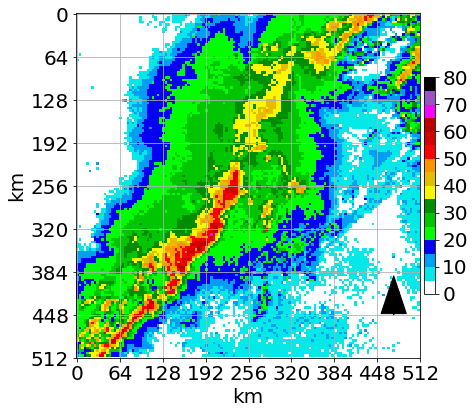

In [7]:
import matplotlib.pyplot as plt
from utils.map_helper import draw_box_plot
%matplotlib inline

plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

ax = plt.subplot(2,3,1)
ax = draw_box_plot(ax, images[0])

### Calculate the mean, median, and probability matched mean for all of the images

In [8]:
from utils.pmmean import _run_pmm_one_variable

img_mean = np.mean(images, axis=0)
img_median = np.median(images, axis=0)
img_pmm = _run_pmm_one_variable(images)

# Plot the results

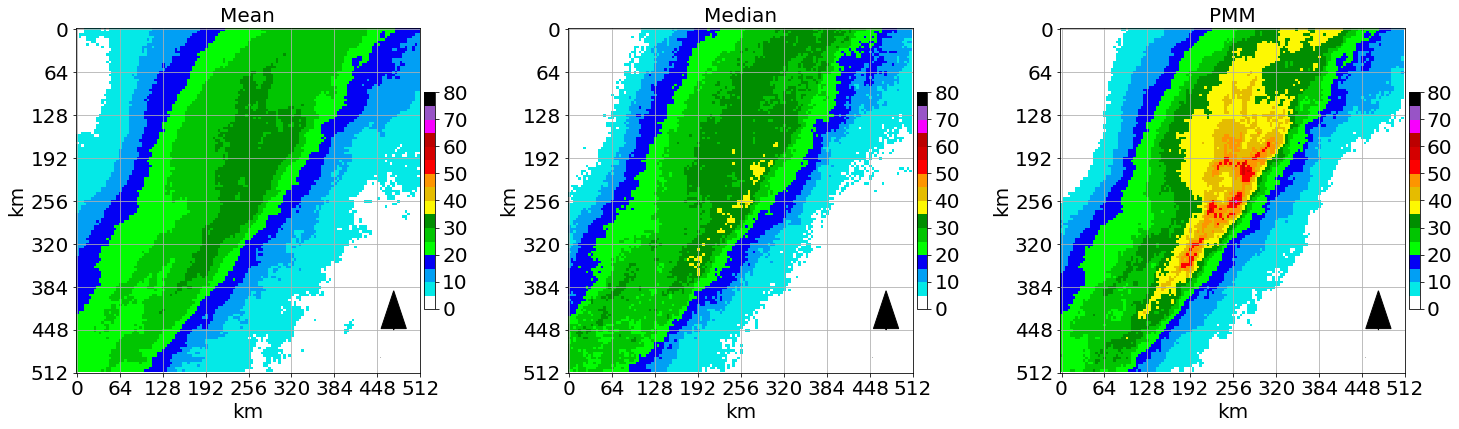

In [9]:
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

ax = plt.subplot(2,3,1)
ax.set_title("Mean", fontsize=20)
ax = draw_box_plot(ax, img_mean)

ax = plt.subplot(2,3,2)
ax.set_title("Median", fontsize=20)
ax = draw_box_plot(ax, img_median)

ax = plt.subplot(2,3,3)
ax.set_title("PMM", fontsize=20)
ax = draw_box_plot(ax, img_pmm)

## The tendencies clearly suggest a QLCS event was taking place

### What about for every February vs. August

In [10]:
from utils.get_images import get_img_list

feb = df_svrgis[df_svrgis.mo==2].copy()
feb_imgs = get_img_list(feb.index.values, data_dir="../data/tor/")
feb_mean = np.mean(feb_imgs, axis=0)
feb_median = np.median(feb_imgs, axis=0)
feb_pmm = _run_pmm_one_variable(feb_imgs)

aug = df_svrgis[df_svrgis.mo==8].copy()
aug_imgs = get_img_list(aug.index.values, data_dir="../data/tor/")
aug_mean = np.mean(aug_imgs, axis=0)
aug_median = np.median(aug_imgs, axis=0)
aug_pmm = _run_pmm_one_variable(aug_imgs)

HTTP Error 404: Not Found ../data/tor//2000/200002231835z000000030.png
HTTP Error 404: Not Found ../data/tor//2004/200402080240z000000723.png
HTTP Error 404: Not Found ../data/tor//2004/200402280830z000000724.png
HTTP Error 404: Not Found ../data/tor//2009/200902112305z000149420.png
HTTP Error 404: Not Found ../data/tor//2011/201102120015z000277086.png
HTTP Error 404: Not Found ../data/tor//2000/200008252200z000000499.png
HTTP Error 404: Not Found ../data/tor//2007/200708061820z000053883.png
HTTP Error 404: Not Found ../data/tor//2009/200908252030z000200491.png
HTTP Error 404: Not Found ../data/tor//2011/201108071735z000340522.png


## Plot the results

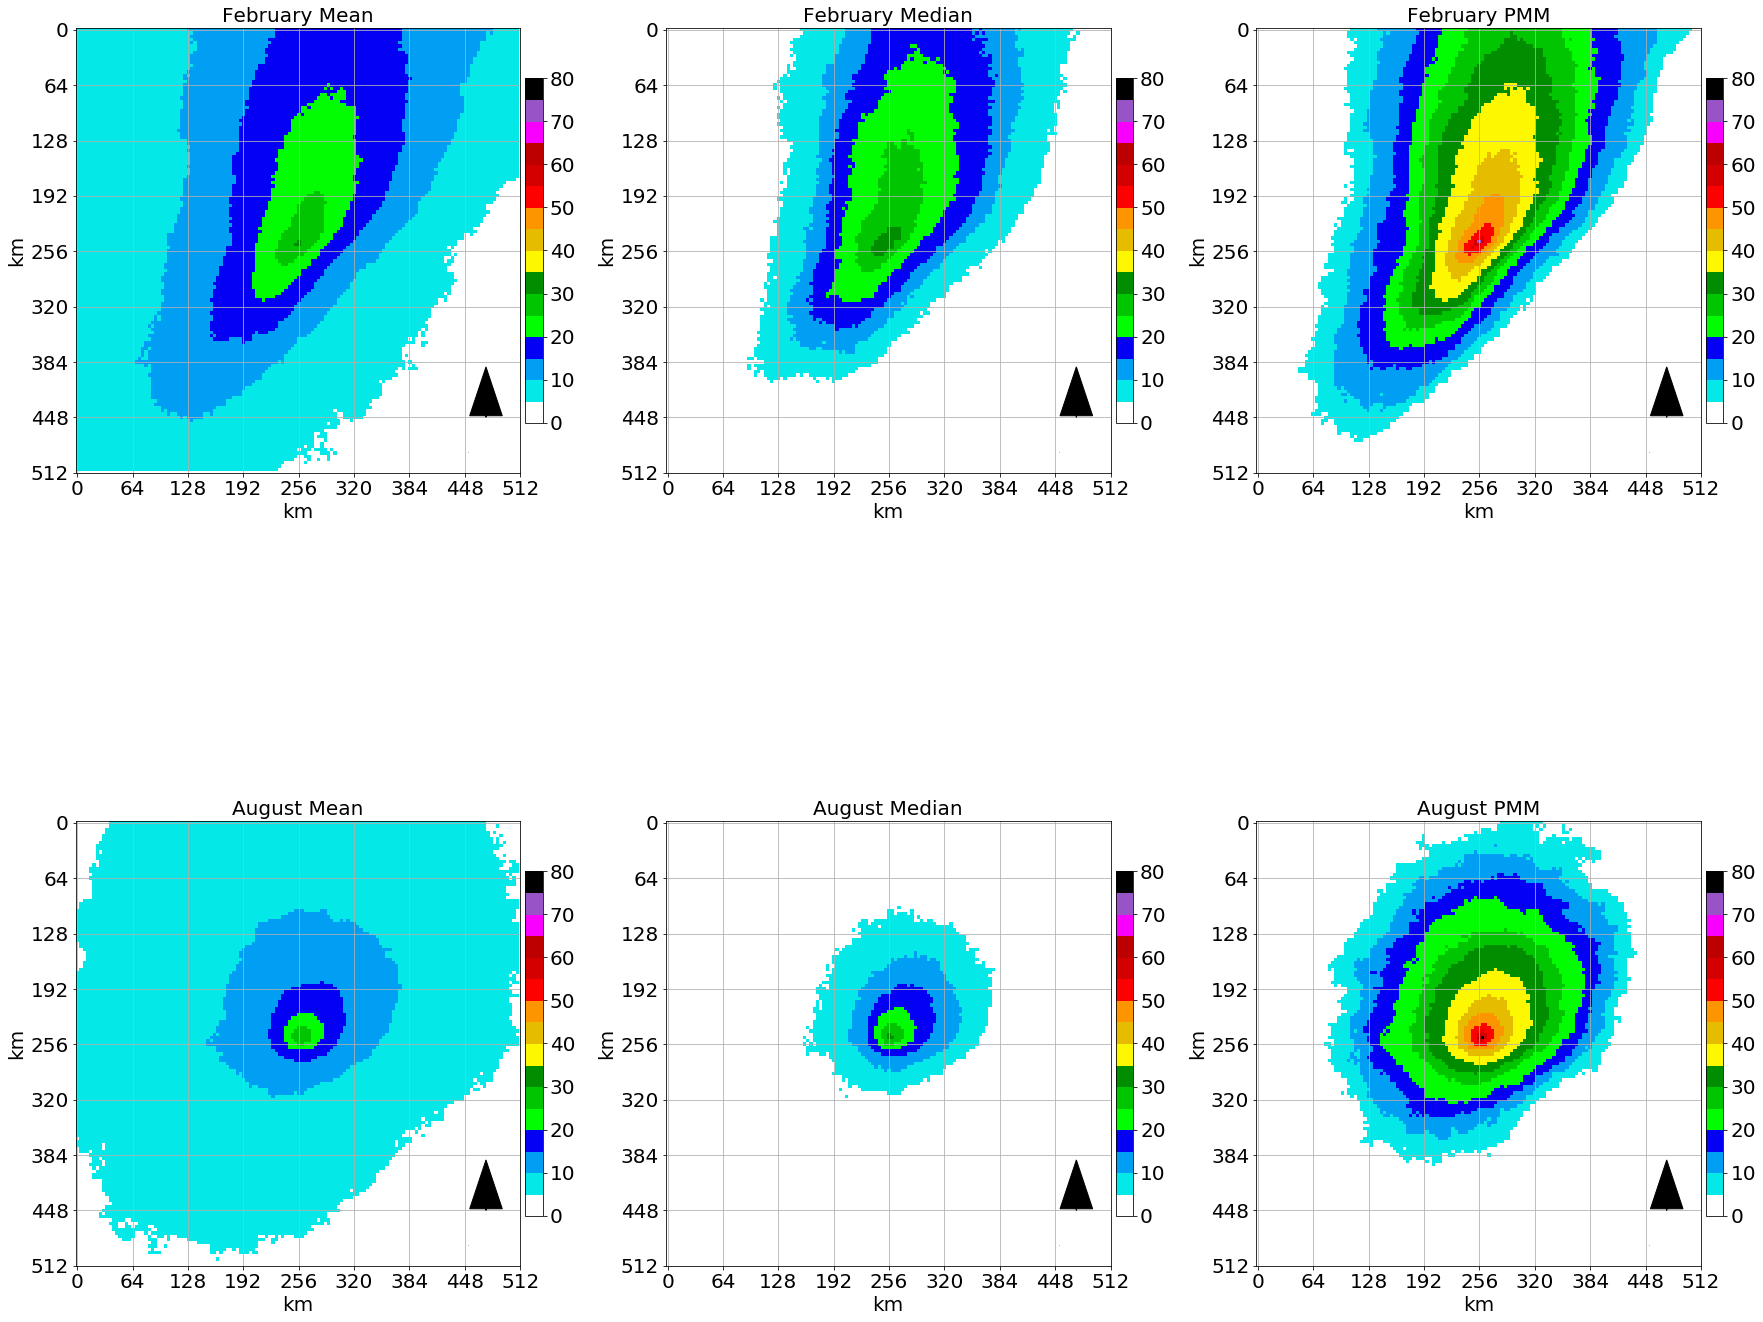

In [11]:
plt.rcParams['figure.figsize'] = 25, 25
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

ax = plt.subplot(2,3,1)
ax.set_title("February Mean", fontsize=20)
ax = draw_box_plot(ax, feb_mean)

ax = plt.subplot(2,3,2)
ax.set_title("February Median", fontsize=20)
ax = draw_box_plot(ax, feb_median)

ax = plt.subplot(2,3,3)
ax.set_title("February PMM", fontsize=20)
ax = draw_box_plot(ax, feb_pmm)

ax = plt.subplot(2,3,4)
ax.set_title("August Mean", fontsize=20)
ax = draw_box_plot(ax, aug_mean)

ax = plt.subplot(2,3,5)
ax.set_title("August Median", fontsize=20)
ax = draw_box_plot(ax, aug_median)

ax = plt.subplot(2,3,6)
ax.set_title("August PMM", fontsize=20)
ax = draw_box_plot(ax, aug_pmm)

plt.tight_layout()

## This illustrates the more compact nature of convective coverage near tornado reports in August compared to February.

#### What about seasonal?

In [12]:
from utils.get_images import get_img_list

djf = df_svrgis[df_svrgis.mo.isin([12, 1, 2])].copy()
djf_imgs = get_img_list(djf.index.values, data_dir="../data/tor/")
djf_mean = np.mean(djf_imgs, axis=0)
djf_median = np.median(djf_imgs, axis=0)
djf_pmm = _run_pmm_one_variable(djf_imgs)

mam = df_svrgis[df_svrgis.mo.isin([3, 4, 5])].copy()
mam_imgs = get_img_list(mam.index.values, data_dir="../data/tor/")
mam_mean = np.mean(mam_imgs, axis=0)
mam_median = np.median(mam_imgs, axis=0)
mam_pmm = _run_pmm_one_variable(mam_imgs)
                
jja = df_svrgis[df_svrgis.mo.isin([6, 7, 8])].copy()
jja_imgs = get_img_list(jja.index.values, data_dir="../data/tor/")
jja_mean = np.mean(jja_imgs, axis=0)
jja_median = np.median(jja_imgs, axis=0)
jja_pmm = _run_pmm_one_variable(jja_imgs)

son = df_svrgis[df_svrgis.mo.isin([9, 10, 11])].copy()
son_imgs = get_img_list(son.index.values, data_dir="../data/tor/")
son_mean = np.mean(son_imgs, axis=0)
son_median = np.median(son_imgs, axis=0)
son_pmm = _run_pmm_one_variable(son_imgs)

HTTP Error 404: Not Found ../data/tor//2000/200002231835z000000030.png
HTTP Error 404: Not Found ../data/tor//2004/200401252345z000000725.png
HTTP Error 404: Not Found ../data/tor//2004/200402080240z000000723.png
HTTP Error 404: Not Found ../data/tor//2004/200402280830z000000724.png
HTTP Error 404: Not Found ../data/tor//2005/200501090650z000000007.png
HTTP Error 404: Not Found ../data/tor//2005/200512050156z000000555.png
HTTP Error 404: Not Found ../data/tor//2008/200812132250z000144604.png
HTTP Error 404: Not Found ../data/tor//2009/200902112305z000149420.png
HTTP Error 404: Not Found ../data/tor//2011/201102120015z000277086.png
HTTP Error 404: Not Found ../data/tor//2002/200203250055z000000015.png
HTTP Error 404: Not Found ../data/tor//2006/200603230735z000000169.png
HTTP Error 404: Not Found ../data/tor//2006/200603260250z000000171.png
HTTP Error 404: Not Found ../data/tor//2012/201203091710z000365991.png
HTTP Error 404: Not Found ../data/tor//2015/201504240056z000565974.png
HTTP E

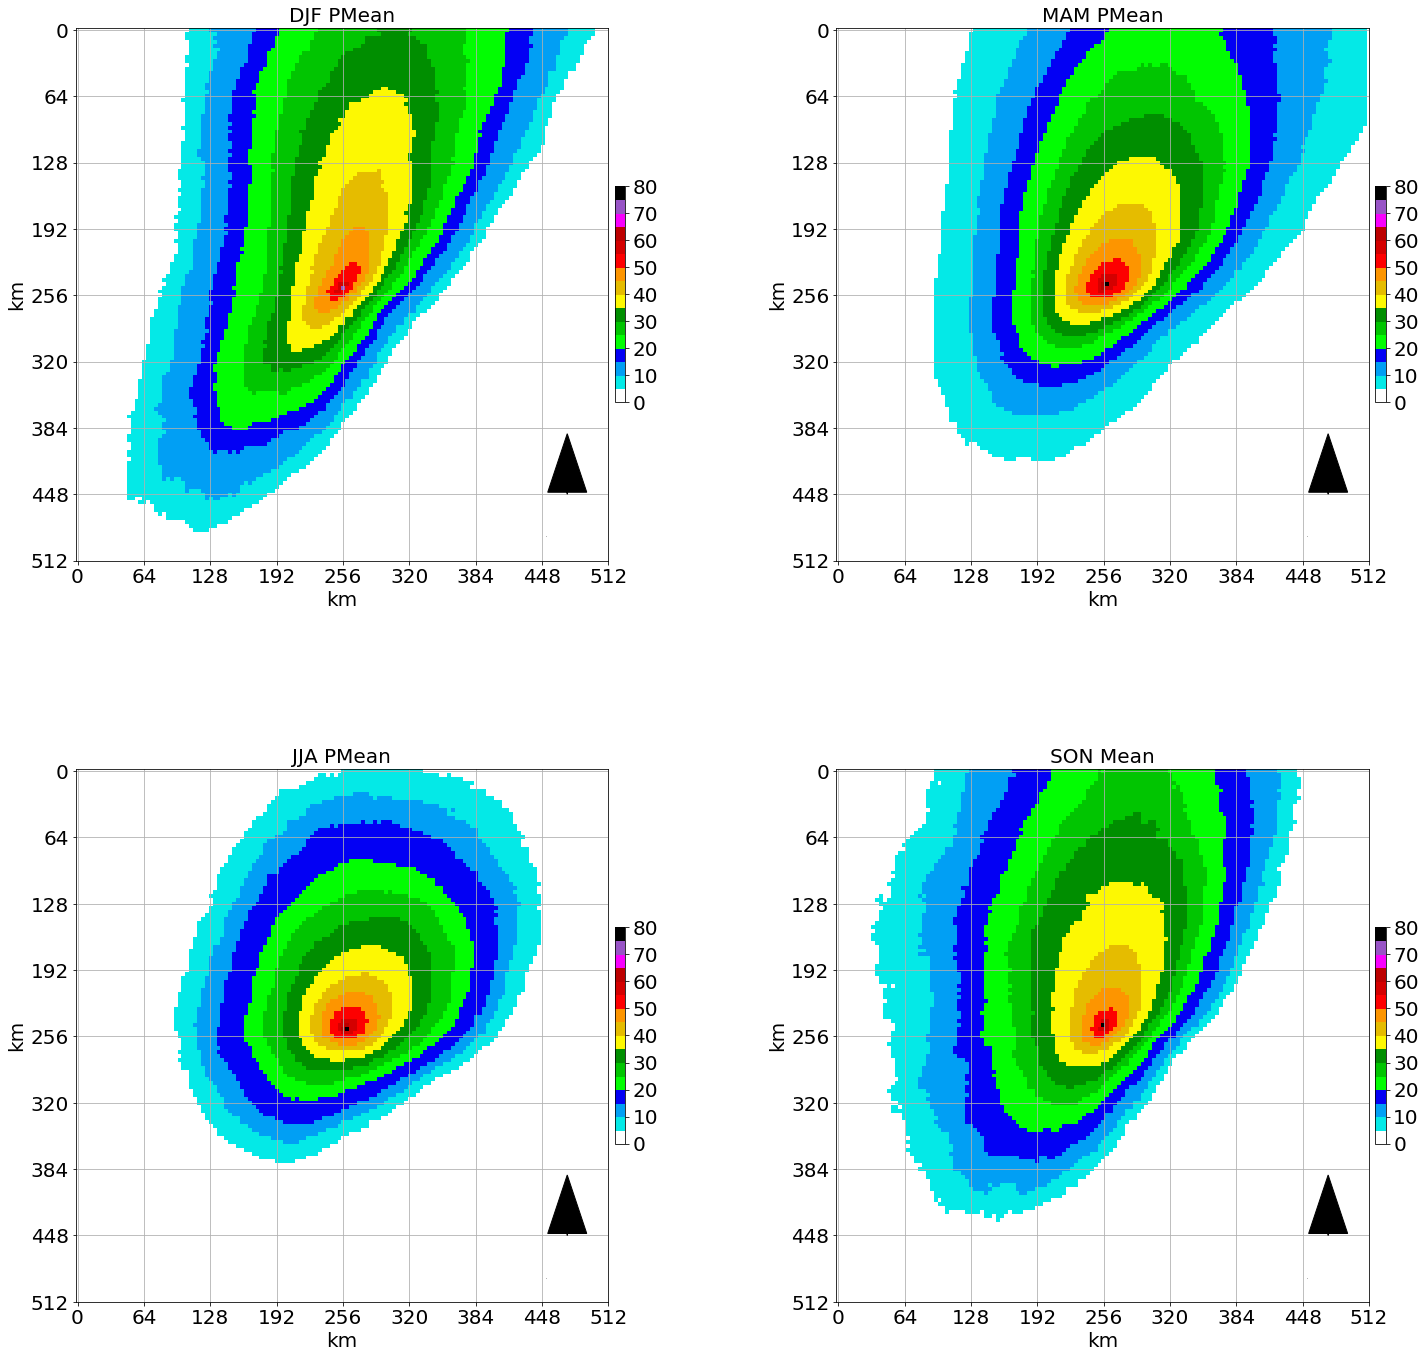

In [13]:
ax = plt.subplot(2,2,1)
ax.set_title("DJF PMean", fontsize=20)
ax = draw_box_plot(ax, djf_pmm)

ax = plt.subplot(2,2,2)
ax.set_title("MAM PMean", fontsize=20)
ax = draw_box_plot(ax, mam_pmm)

ax = plt.subplot(2,2,3)
ax.set_title("JJA PMean", fontsize=20)
ax = draw_box_plot(ax, jja_pmm)

ax = plt.subplot(2,2,4)
ax.set_title("SON Mean", fontsize=20)
ax = draw_box_plot(ax, son_pmm)